In [1]:
import ee

In [2]:
import numpy as np
import pandas as pd

In [3]:
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=Plqgl2BvM5ZHSgoSWauRfd1mTVkfZEzM1beizSXwP3M&tc=ur4k1x5thaZGJN1yzJS8n-sfg3vHc1lblerB99MTXm8&cc=ynJuhOzv18cgo7tG0GWlutl7go_Yg4ZL4_tvKim6i18

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AbUR2VObFzk8_5ZC-re-uQYHOJNoCeU_NaiNPOa3kR9sJqM2LyMcwhh9pCg

Successfully saved authorization token.


In [4]:
#compute ndvi
def getNDVI(image):
  ndvi = image.normalizedDifference(['B8', 'B4']).rename('NDVI')
  image = image.addBands(ndvi)
  return image

In [5]:
#compute evi
def getEVI(image):
  EVI = image.expression(
      '2.5 * ((NIR - RED) / (NIR + 6 * RED - 7.5 * BLUE + 1))', {
          'NIR': image.select('B8').divide(10000),
          'RED': image.select('B4').divide(10000),
          'BLUE': image.select('B2').divide(10000)
      }
  ).rename('EVI')

  image = image.addBands(EVI)

  return image

In [6]:
def addDate(image):
  img_date = ee.Date(image.date())
  img_date = ee.Number.parse(img_date.format('YYYYMMdd'))
  return image.addBands(ee.Image(img_date).rename('date').toInt())

In [31]:
countries = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017')
#aoi = countries.filter(ee.Filter.eq("country_na", "India")).geometry()

aoi = ee.Geometry.Polygon(coords=[74.61150552391857,15.15716535847586, 74.61284606318959,15.15707180593215, 74.61323449799805,15.15754146197302, 74.61345369578233,15.15840407311949, 74.61334427334185,15.15932621075057, 74.61321827154769,15.16011018275566,   74.61150552391857,15.15716535847586]).bounds()


In [32]:
sentinel_data = ee.ImageCollection("COPERNICUS/S2") \
.filterDate("2022-01-01", "2022-12-31") \
.filterBounds(aoi) \
.map(getEVI).map(addDate).median()

In [33]:
sentinel_data

In [34]:
sentinel_data

In [35]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
aoi_region = sentinel_data.clip(aoi)

In [37]:
aoi_image_bands = aoi_region.select(['EVI'])

In [38]:
aoi_image = aoi_image_bands.float()

In [39]:
!pip install geemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
import geemap

In [51]:
geemap.ee_export_image(aoi_image, filename='./output_evi.tif', scale=10, region=aoi, file_per_band=False)

Generating URL ...
Please wait ...
Data downloaded to /content/output_evi.tif


In [52]:
import rasterio

data = rasterio.open('./output_evi.tif')

In [53]:
data

<open DatasetReader name='./output_evi.tif' mode='r'>

In [54]:
from rasterio.plot import show

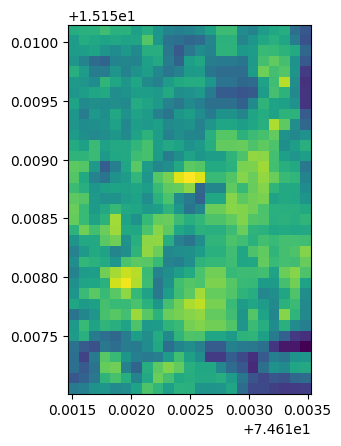

<Axes: >

In [55]:
show(data)

In [56]:
data.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -inf,
 'width': 23,
 'height': 35,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(8.983152841195215e-05, 0.0, 74.6114623846435,
        0.0, -8.983152841195215e-05, 15.160148397857869)}